In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train_dir = "/content/gdrive/My Drive/Potato/Train"
test_dir = "/content/gdrive/My Drive/Potato/Test"
valid_dir = "/content/gdrive/My Drive/Potato/Valid"

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(224, 224, 3)),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
  tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
  tf.keras.layers.experimental.preprocessing.RandomHeight(0.2),
  tf.keras.layers.experimental.preprocessing.RandomWidth(0.2),
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
], name ="data_augmentation")

In [ ]:
import tensorflow as tf

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory = train_dir,
    image_size = IMG_SIZE,
    label_mode = 'categorical',
    batch_size = BATCH_SIZE,
    shuffle = True
).cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory = test_dir,
    image_size = IMG_SIZE,
    label_mode = 'categorical',
    batch_size = BATCH_SIZE
).cache().prefetch(buffer_size=tf.data.AUTOTUNE)

valid_datasets = tf.keras.preprocessing.image_dataset_from_directory(
    directory = valid_dir,
    image_size = IMG_SIZE,
    label_mode = 'categorical',
    batch_size = BATCH_SIZE
)

class_names = valid_datasets.class_names
valid_data = valid_datasets.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

Found 900 files belonging to 3 classes.
Found 300 files belonging to 3 classes.
Found 300 files belonging to 3 classes.


In [ ]:
valid_datasets.class_names
valid_datasets.file_path

AttributeError: ignored

In [ ]:
[(images, label_batch)] = train_data.take(1)
images


<tf.Tensor: shape=(32, 224, 224, 3), dtype=float32, numpy=
array([[[[158.18878 , 151.18878 , 159.18878 ],
         [165.52042 , 158.52042 , 166.52042 ],
         [170.37244 , 163.37244 , 171.37244 ],
         ...,
         [143.33676 , 132.33676 , 138.33676 ],
         [147.87248 , 136.87248 , 142.87248 ],
         [153.43886 , 142.43886 , 148.43886 ]],

        [[168.21428 , 161.21428 , 169.21428 ],
         [169.59694 , 162.59694 , 170.59694 ],
         [166.63266 , 159.63266 , 167.63266 ],
         ...,
         [144.44388 , 133.44388 , 139.44388 ],
         [146.85207 , 135.85207 , 141.85207 ],
         [150.3572  , 139.3572  , 145.3572  ]],

        [[171.14796 , 164.14796 , 172.14796 ],
         [173.89287 , 166.89287 , 174.89287 ],
         [172.22449 , 165.22449 , 173.22449 ],
         ...,
         [143.82649 , 132.82649 , 138.82649 ],
         [143.00511 , 132.00511 , 138.00511 ],
         [145.92862 , 134.92862 , 140.92862 ]],

        ...,

        [[191.0714  , 182.0714  ,

In [ ]:
for i in images:
  print(len(i))
len(images)
#label_batch

224
224
224
224
224
224
224
224
224
224
224
224
224
224
224
224
224
224
224
224
224
224
224
224
224
224
224
224
224
224
224
224


32

In [ ]:
[(images, label_batch)] = train_data.take(1)
total_classes = label_batch.shape[-1]
total_classes

3

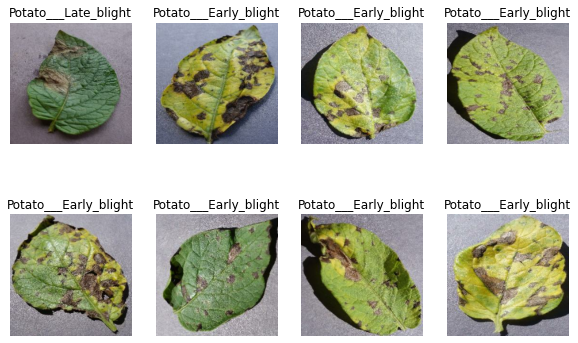

In [ ]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in train_data.take(1):
    for i in range(0,8):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint32"))
        plt.title(class_names[np.argmax(label_batch[i])])
        plt.axis("off")

In [ ]:
checkpoint_path = "/CheckPoint/cp.ckpt"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path,
    save_weights_only=True,
    monitor='val_accuracy',
    save_best_only=True
)

In [ ]:
model = tf.keras.Sequential([
    data_augmentation,
    tf.keras.layers.Conv2D(60, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(60, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(60, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(total_classes, activation='softmax', name='output_layers')

])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 conv2d (Conv2D)             (None, None, None, 60)    1680      
                                                                 
 max_pooling2d (MaxPooling2D  (None, None, None, 60)   0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, None, None, 60)    32460     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, None, None, 60)   0         
 2D)                                                             
                                                        

In [ ]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(
    train_data,
    epochs=40,
    validation_data = test_data,
    validation_steps = len(test_data),
    callbacks = [
        checkpoint_callback,
    ]
)

Epoch 1/40


29/29 [==============================] - 143s 5s/step - loss: 1.0871 - accuracy: 0.3744 - val_loss: 1.0424 - val_accuracy: 0.3333
Epoch 2/40
29/29 [==============================] - 91s 3s/step - loss: 0.9994 - accuracy: 0.4767 - val_loss: 0.8689 - val_accuracy: 0.6067
Epoch 3/40
29/29 [==============================] - 94s 3s/step - loss: 0.8379 - accuracy: 0.6000 - val_loss: 0.7199 - val_accuracy: 0.6800
Epoch 4/40
29/29 [==============================] - 103s 4s/step - loss: 0.8206 - accuracy: 0.6067 - val_loss: 0.6974 - val_accuracy: 0.7033
Epoch 5/40
29/29 [==============================] - 93s 3s/step - loss: 0.6932 - accuracy: 0.7000 - val_loss: 0.6598 - val_accuracy: 0.6333
Epoch 6/40
29/29 [==============================] - 96s 3s/step - loss: 0.6032 - accuracy: 0.7233 - val_loss: 0.4949 - val_accuracy: 0.8567
Epoch 7/40
29/29 [==============================] - 90s 3s/step - loss: 0.5264 - accuracy: 0.8000 - val_loss: 0.7247 - val_accuracy: 0.6133
Epoch 8/40
29/29 [===========

In [ ]:
def bestWeightModelEvaluate(model, weight_path, data):
  cp_model = tf.keras.models.clone_model(model)
  cp_model.compile(
      loss = tf.keras.losses.CategoricalCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(),
      metrics = ['accuracy']
  )
  cp_model.load_weights(weight_path)
  cp_model.evaluate(data)

In [ ]:
bestWeightModelEvaluate(
    model = model,
    weight_path= checkpoint_path,
    data = valid_data
)

10/10 [==============================] - 47s 815ms/step - loss: 0.1441 - accuracy: 0.9433


In [ ]:
bestWeightModelEvaluate(
    model = model,
    weight_path= checkpoint_path,
    data = test_data
)

10/10 [==============================] - 8s 761ms/step - loss: 0.1065 - accuracy: 0.9733


In [ ]:
model.evaluate(test_data)

10/10 [==============================] - 7s 712ms/step - loss: 0.1065 - accuracy: 0.9733


[0.10645029693841934, 0.9733333587646484]

In [ ]:
model.evaluate(valid_data)

10/10 [==============================] - 8s 780ms/step - loss: 0.1441 - accuracy: 0.9433


[0.14413714408874512, 0.9433333277702332]

In [ ]:
import numpy as np
predictions = model.predict(valid_data)
predictions = np.argmax(predictions, axis=-1)
predictions.shape

10/10 [==============================] - 8s 800ms/step


(300,)

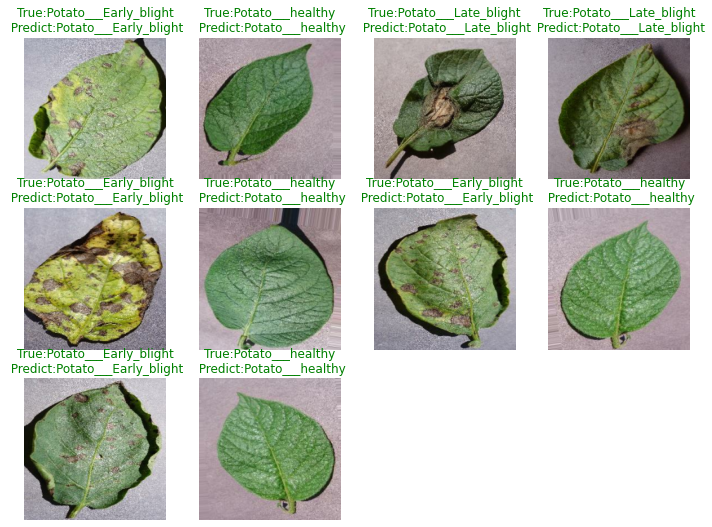

In [ ]:
plt.figure(figsize=(12,12))
for image_batch,label_batch in valid_data.take(1):
    for i in range(0,10):
        plt.subplot(4,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint32"))
        true_class = class_names[np.argmax(label_batch[i])]
        predict_class = class_names[predictions[i]]
        title = f"""True:{true_class}\n Predict:{predict_class}"""
        plt.title(title, color='g' if true_class==predict_class else 'r')
        plt.axis("off")